In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/drinksbycountry"

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url, sep=",")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
data=pd.read_csv('beer-servings.csv')

In [6]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
# other option to drop columns, data.drop("Unnamed: 0", axis=1, inplace=True)
data=pd.read_csv('beer-servings.csv', index_col = "Unnamed: 0")

In [8]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [9]:
data.shape

(193, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [11]:
# to find null values
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [12]:
# or data.isnull().sum()

## Fill missing values

In [13]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [14]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [15]:
# extract numerical values to separate variable
num_cols= data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [16]:

num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

Method 1

In [17]:
# simple imputer

from sklearn.impute import SimpleImputer

In [18]:
# fill missing values with mean using SimpleImputer and transform the num_cols 

imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [19]:
type(num_cols)

numpy.ndarray

In [20]:
# convert resulting array to dataframe
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']] )

In [21]:
type(num_cols)

pandas.core.frame.DataFrame

In [22]:
# check null values
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [23]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [24]:
# drop columns from num-cols in the original dataframe
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis=1, inplace=True)

In [25]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [26]:
# add cleaned data back to original dataframe
data = pd.concat([num_cols, data], axis=1)

In [27]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [28]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

Method 2

In [29]:
data=pd.read_csv('beer-servings.csv', index_col = "Unnamed: 0")

In [30]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

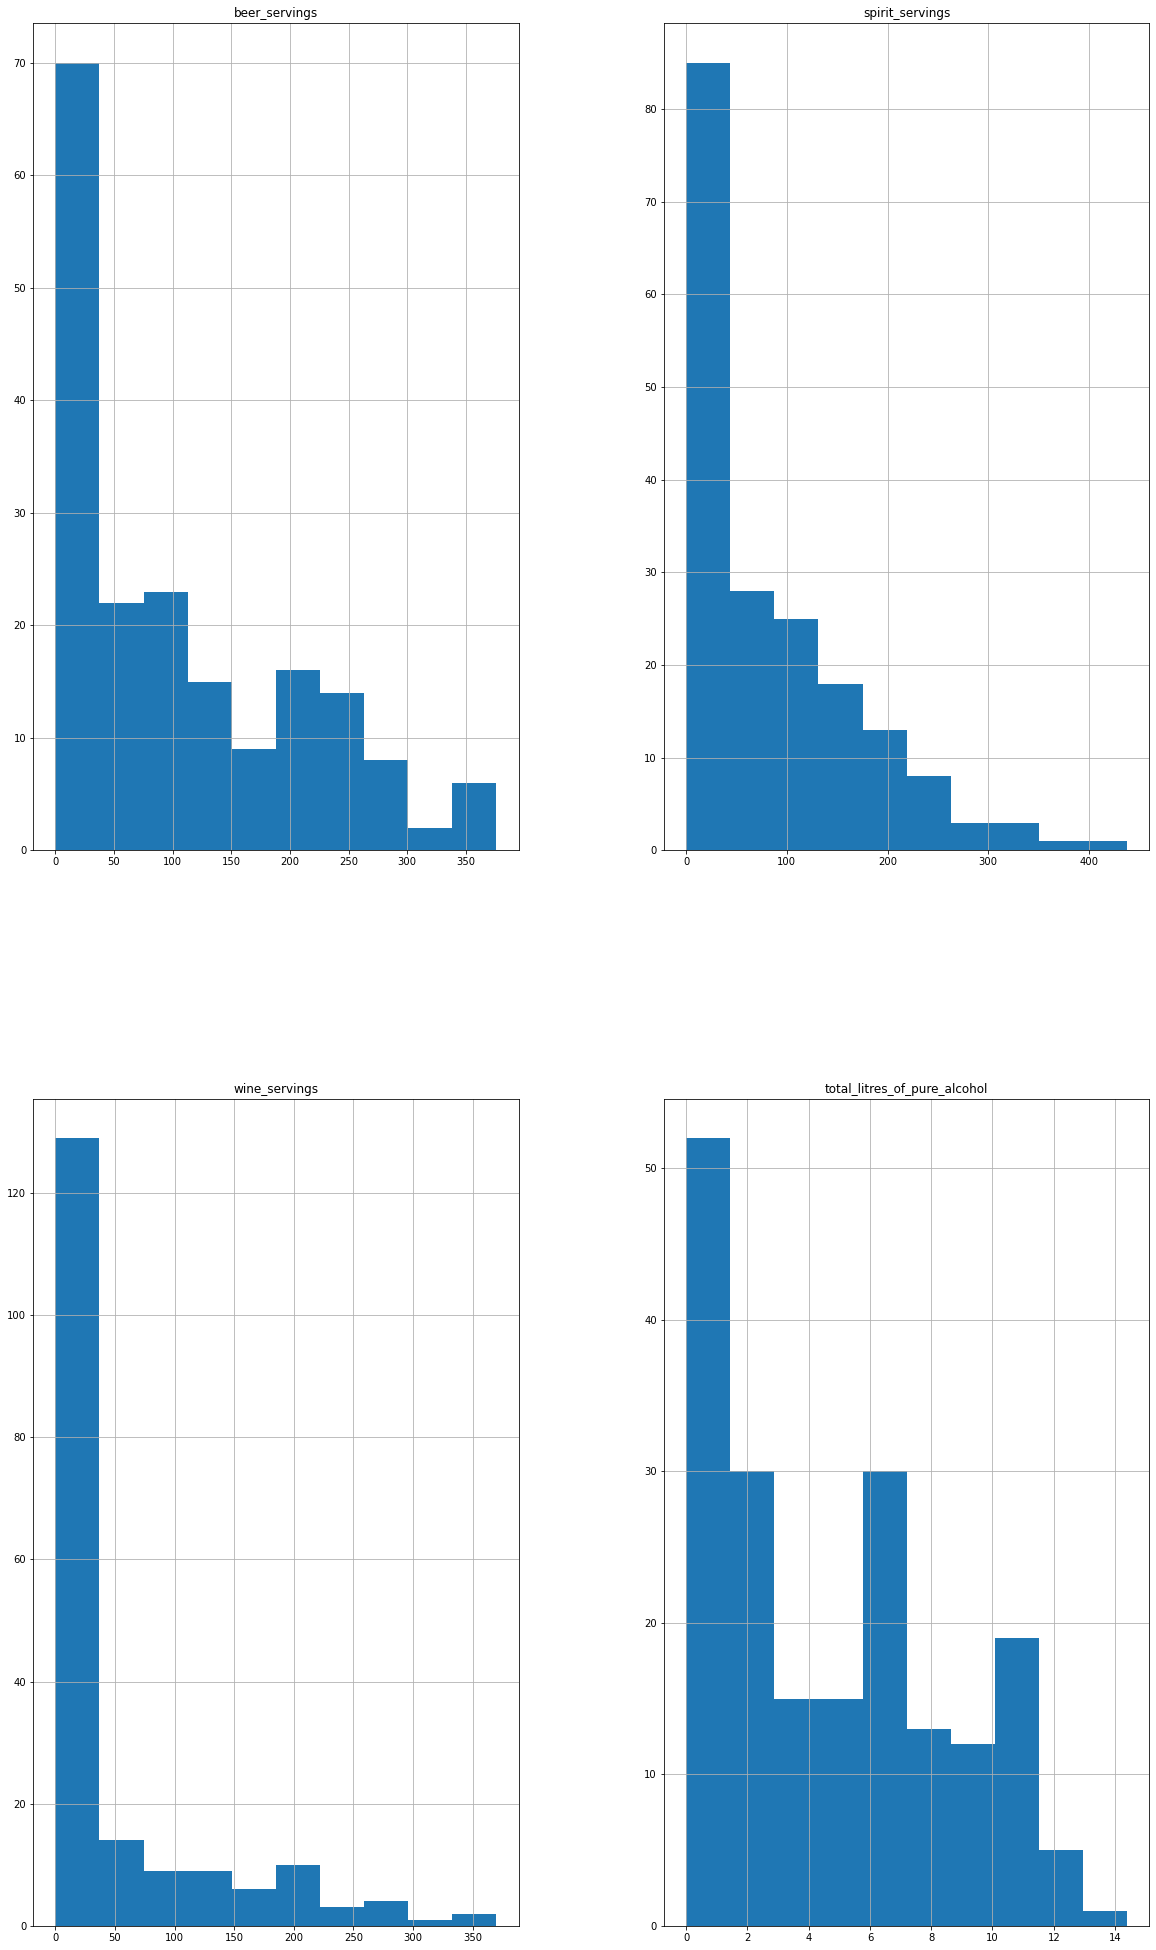

In [31]:
# plot histogram to find distribution

freqgraph = data.select_dtypes(include=["float"])
freqgraph.hist(figsize=(20,35))
plt.show()

In [32]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [33]:
# fill null values with median 
data["beer_servings"] = data["beer_servings"].fillna(data["beer_servings"].median())

In [34]:
data["beer_servings"].isna().sum()

0

In [35]:
# use for loop to fill null values with median in all columns

for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [36]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

## Managing Outliers

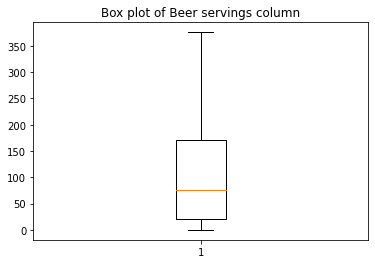

In [37]:
# use boxplot to find outliers visually

plt.boxplot(data['beer_servings'])
plt.title("Box plot of Beer servings column")
plt.show()

No outliers in the boxplot

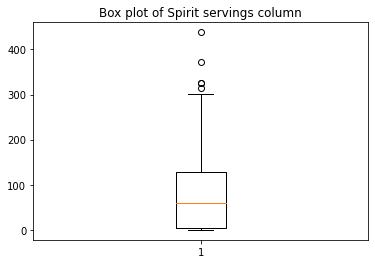

In [38]:
plt.boxplot(data['spirit_servings'])
plt.title("Box plot of Spirit servings column")
plt.show()

In [39]:
# find q1, q2, q3 for spirit servings column

q1 = np.percentile(data["spirit_servings"],25,interpolation="midpoint")
q2 = np.percentile(data["spirit_servings"],50,interpolation="midpoint")
q3 = np.percentile(data["spirit_servings"],75,interpolation="midpoint")

In [40]:
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [41]:
data["spirit_servings"].median()

60.0

In [42]:
# find inter-quartile range
iqr = q3-q1

In [43]:
print(iqr)

123.0


In [44]:
# find upper limit and lower limit using below formula
low_lim = q1-1.5*iqr
up_lim = q3 + 1.5*iqr


In [45]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [46]:
# run for loop to find all values that are outliers

outlier =[]
for x in data["spirit_servings"]:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [47]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [48]:
ind = data["spirit_servings"]>up_lim

In [49]:
# locate the index of outliers
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [50]:
# drop outliers from original dataset

data.drop([15, 68, 73, 141, 144], inplace=True)

In [51]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


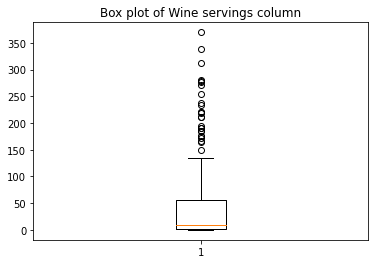

In [52]:
#plot boxplot to check for outliers
plt.boxplot(data['wine_servings'])
plt.title("Box plot of Wine servings column")
plt.show()

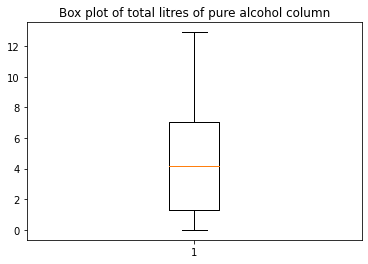

In [53]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title("Box plot of total litres of pure alcohol column")
plt.show()

Boxplots show no outliers for total liters of pure alcohol column.

In [54]:
# find q1, q2, q3 for wine servings column

q1 = np.percentile(data["wine_servings"],25,interpolation="midpoint")
q2 = np.percentile(data["wine_servings"],50,interpolation="midpoint")
q3 = np.percentile(data["wine_servings"],75,interpolation="midpoint")

In [55]:
print(q1)
print(q2)
print(q3)

1.0
9.0
57.5


In [56]:
# find inter-quartile range

iqr = q3-q1
print(iqr)

56.5


In [57]:
# find upper limit and lower limit using below formula

low_lim = q1-1.5*iqr
up_lim = q3 + 1.5*iqr

In [58]:
print(low_lim, up_lim)

-83.75 142.25


In [59]:
# run for loop to find all values that are outliers

outliers=[]
for y in data["wine_servings"]:
    if ((y<low_lim)or (y>up_lim)):
        outliers.append(y)
        

In [60]:
print(outliers)

[312.0, 221.0, 212.0, 191.0, 212.0, 172.0, 254.0, 278.0, 233.0, 370.0, 149.0, 175.0, 218.0, 185.0, 165.0, 237.0, 271.0, 190.0, 175.0, 339.0, 167.0, 276.0, 186.0, 280.0, 195.0, 220.0]


In [61]:
# all outliers above up_lim, so find index for values> up_lim

ind1 = data["wine_servings"]>up_lim
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [62]:
# find q1, q2, q3 for total liters of pure alcohol column

q1 = np.percentile(data["total_litres_of_pure_alcohol"],25,interpolation="midpoint")
q2 = np.percentile(data["total_litres_of_pure_alcohol"],50,interpolation="midpoint")
q3 = np.percentile(data["total_litres_of_pure_alcohol"],75,interpolation="midpoint")
print(q1)
print(q2)
print(q3)

1.25
4.2
7.05


In [63]:
# find inter-quartile range

iqr = q3-q1
print(iqr)

5.8


In [64]:
# find upper limit and lower limit using below formula

low_lim = q1-1.5*iqr
up_lim = q3 + 1.5*iqr
print(low_lim, up_lim)

-7.449999999999999 15.75


In [65]:
# run for loop to find all values that are outliers

outliers1=[]
for z in data["total_litres_of_pure_alcohol"]:
    if ((z<low_lim)or (z>up_lim)):
        outliers1.append(z)
        

In [66]:
print(outliers1)

[]


There are no outliers in total_litres_of_pure_alcohol column